In [1]:
#data generation for lorenz system
import numpy as np
import scipy.integrate
import random

random.seed(32)  # Python random seed
np.random.seed(32)  # NumPy random seed

print("Generating data")
# Simulation variables
seq_length = 5001 # Number of time steps in each sequence
num_records = 50 # Number of sequences to generate
dim_y = 1  # No. of observables
dim_x= 3 # Number of states
dt=0.01
end_t=seq_length*dt

# Arrays to store results
X_data_array = np.empty((num_records, seq_length, dim_x))
Y_data_array = np.empty((num_records, seq_length, dim_y))

# Continuous-time model
def f(t,x):
    s=10
    r=28
    b=8/3
    x1,x2,x3=x
    dx1 = -(s*x1)+(s*x2)
    dx2 = (r*x1)-x2-(x1*x3) 
    dx3 = (x1*x2)-(b*x3)
    return np.array([dx1, dx2,dx3])

def rk4_step(f, x, t, dt):
    k1 = f(t, x)
    k2 = f(t + dt/2, x + dt/2 * k1)
    k3 = f(t + dt/2, x + dt/2 * k2)
    k4 = f(t + dt, x + dt * k3)
    return x + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

P=0.0001*np.identity(dim_x) #covariance of initial condition
mu_pn = np.zeros(dim_x) #mean of process noise
Q=0.01*np.identity(dim_x) #process noise covariance
mu_mn=np.zeros(dim_y) #mean of measurement noise
R=[0.01] #measurement noise covariance
G=np.identity(dim_x) #process noise coefficient matrix
H=np.array(([[1],[1],[0]])) #measurment matrix


t_span= np.arange(0,end_t,dt)
num_timesteps=np.shape(t_span)[0]

for i in range(0, num_records, 1):
    mu_x0=np.random.uniform(-2,2,size=3) #mean of initial condition
    x=np.random.multivariate_normal(mu_x0,P)
    
    X_data_array[i, 0, :] = x
    Y_data_array[i, 0, :] = np.matmul(x,H) + np.random.normal(mu_mn, R)

    for j in range(1, seq_length):
        x = rk4_step(f, x, t_span[j-1], dt)
        w = np.random.multivariate_normal(mu_pn, Q)
        x = x + G @ w
        X_data_array[i, j, :] = x

        v = np.random.normal(mu_mn, R)
        Y_data_array[i, j, :] = np.matmul(x,H) + v
        
np.savez("lorenz_data_hackathon.npz", X_data=X_data_array, Y_data=Y_data_array)

Generating data


In [2]:
#for different initial condition
X_data_array_diff_ic = np.empty((num_records, seq_length, dim_x))
Y_data_array_diff_ic = np.empty((num_records, seq_length, dim_y))

# Simulation loop
for i in range(num_records):
    mu_x0 = np.random.uniform(-10, 10, size=dim_x)
    x = np.random.multivariate_normal(mu_x0, P)
    
    X_data_array_diff_ic[i, 0, :] = x
    Y_data_array_diff_ic[i, 0, :] = np.matmul(x,H) + np.random.normal(mu_mn, R)

    for j in range(1, seq_length):
        x = rk4_step(f, x, t_span[j-1], dt)
        w = np.random.multivariate_normal(mu_pn, Q)
        x = x + G @ w
        X_data_array_diff_ic[i, j, :] = x

        v = np.random.normal(mu_mn, R)
        Y_data_array_diff_ic[i, j, :] = np.matmul(x,H) + v
        
np.savez("lorenz_data_diff_ic_hackathon.npz", X_data_diff_ic=X_data_array_diff_ic, Y_data_diff_ic=Y_data_array_diff_ic)

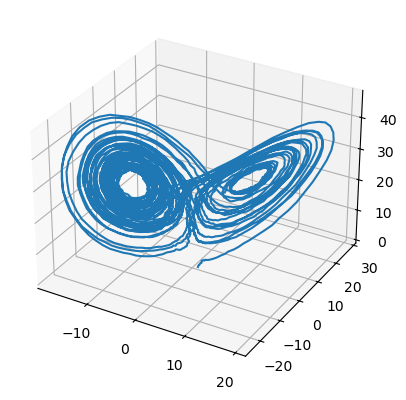

In [3]:
import matplotlib.pyplot as plt
ax = plt.axes(projection='3d')
ax.plot3D(X_data_array[0,:,0],X_data_array[0,:,1],X_data_array[0,:,2])